## Import Data
Importing churn dataset

In [2]:
import ImportModule 
import_obj = ImportModule.Importing()
url = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_clean.csv"
df = import_obj.import_from_url(url)

Importing init
Imported
['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


## Clean Data
Removing columns not relevant for this analysis.

In [3]:
import CleanModule
clean_obj = CleanModule.Cleaning(df)
list_to_remove = ["Customer_id","Interaction","UID","State","TimeZone","City","County","Zip"
    ,"Lat","Lng","Job","Item1","Item2","Item3","Item4","Item5","Item6","Item7","Item8"]
clean_obj.remove_columns(list_to_remove)
df = clean_obj._df


Cleaning init
Columns Removed.
['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

Complete details in df_info.txt file


## Summary Statistics

In [4]:

df_churn_yes = df.loc[df["Churn"]=="Yes"]
df_churn_no = df.loc[df["Churn"]=="No"]

In [5]:

import SummaryStatisticsModule as s
summaryStatistics_obj = s.SummaryStatistics()

summaryStatistics_obj.get_df_summary(df, "MonthlyCharge")

print("\nChurn YES")
summaryStatistics_obj.get_df_summary(df_churn_yes, "MonthlyCharge")

print("\nChurn NO")
summaryStatistics_obj.get_df_summary(df_churn_no, "MonthlyCharge")


Summary Statistics init
MonthlyCharge
Max: 290.160419
Min: 79.97886
Mean: 172.62
Median: 167.48
Mode: [179.9476]
Variance: 1843.92
St. Dev: 42.94

Churn YES
MonthlyCharge
Max: 290.160419
Min: 92.45514
Mean: 199.30
Median: 200.12
Mode: [240.1149]
Variance: 1702.42
St. Dev: 41.26

Churn NO
MonthlyCharge
Max: 290.1604
Min: 79.97886
Mean: 163.01
Median: 159.96
Mode: [112.4551]
Variance: 1546.02
St. Dev: 39.32


## Distribution Graphs


Distribution Graphs init




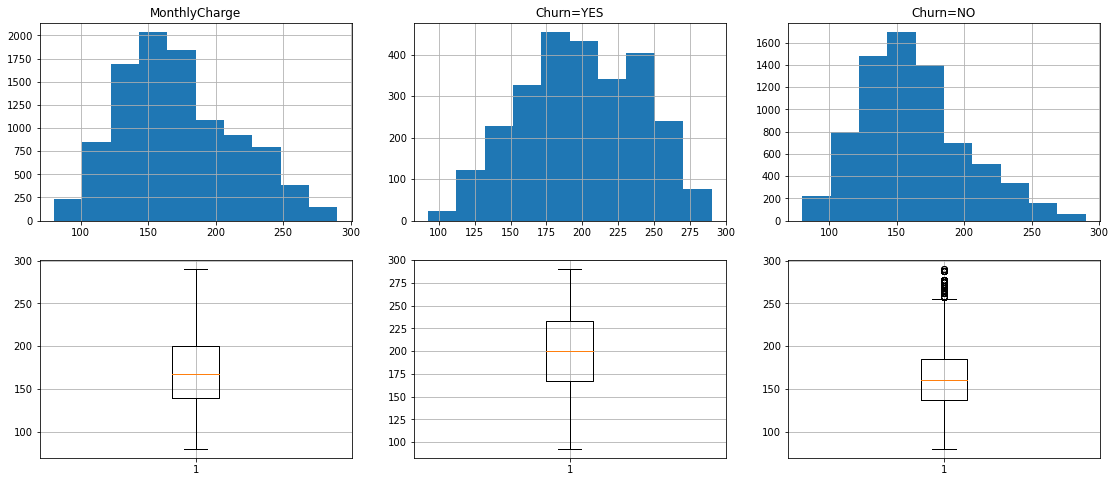

In [6]:
import Graphs.DistributionGraphsModule as d

dist_graph_obj = d.DistributionGraphs()
dist_graph_obj.show_2x3_graphs(df, df_churn_yes, df_churn_no, "MonthlyCharge")

## Transform data
Get dummy variables from categorical data

In [7]:
import TransformModule

categorical_columns_list = import_obj.get_categorical_columns_list(df)
numerical_columns_list = import_obj.get_numerical_columns_list(df)

transform_obj = TransformModule.Transforming(df)
transform_obj.categorical_columns_to_dummy(categorical_columns_list)
df = transform_obj._df
df.head()


Categorical Columns
['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

Numerical Columns
['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

Transforming init

Got Dummy variables
['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One_year', 'Contract_Two_Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber_Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentM

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit_Card_automatic,PaymentMethod_Electronic_Check,PaymentMethod_Mailed_Check
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,...,1,1,0,0,0,1,1,1,0,0
2,10446,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,...,1,0,0,0,1,1,1,0,0,0
3,3735,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,...,0,0,0,0,0,1,1,1,0,0
4,13863,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,...,1,0,0,0,1,0,1,0,0,1
5,11352,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,...,0,0,0,1,1,0,0,0,0,1


## Sampling Data
75% Trainig sample , 25% Test sample

In [8]:
import SamplingModule

categorical_columns_list = import_obj.get_categorical_columns_list(df)
numerical_columns_list = import_obj.get_numerical_columns_list(df)

sample_obj = SamplingModule.Sampling()   
df_filtered = import_obj.filter_df_by_columns(df, numerical_columns_list)
target = 'MonthlyCharge'
stratif_by = 'Churn_Yes'
x_train, x_test, y_train, y_test = sample_obj.stratified_sampling(df_filtered, target, stratif_by)


Categorical Columns
['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

Numerical Columns
['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One_year', 'Contract_Two_Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber_Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit_Card_automatic', 'PaymentMet

## Linear Regression

In [9]:
import Models.LinearRegressionModel as model
linearRegression_obj = model.LinearRegression()
numeric_columns = numerical_columns_list
numeric_columns.remove(target)
train_df = x_train.join(y_train)
linearRegression_obj.multiple_linear_regression(target, numeric_columns, train_df)


LinearRegression init

formula =  MonthlyCharge ~ Population + Children + Age + Income + Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + Tenure + Bandwidth_GB_Year + Area_Suburban + Area_Urban + Marital_Married + Marital_Never_Married + Marital_Separated + Marital_Widowed + Gender_Male + Gender_Nonbinary + Churn_Yes + Techie_Yes + Contract_One_year + Contract_Two_Year + Port_modem_Yes + Tablet_Yes + InternetService_Fiber_Optic + InternetService_None + Phone_Yes + Multiple_Yes + OnlineSecurity_Yes + OnlineBackup_Yes + DeviceProtection_Yes + TechSupport_Yes + StreamingTV_Yes + StreamingMovies_Yes + PaperlessBilling_Yes + PaymentMethod_Credit_Card_automatic + PaymentMethod_Electronic_Check + PaymentMethod_Mailed_Check + 0

R-squared =  0.9992548715186094
R-squared adjusted =  0.9992508044570907
MSE =  23.733142439223503
RSE =  23.61105139495205
MRSE =  4.858426224639804
RSE =  4.871667316147882

Model summary saved on model_summary.txt


## Feature Selection

/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312664.12736336724, tolerance: 1285.0855493406336
  model = cd_fast.enet_coordinate_descent(


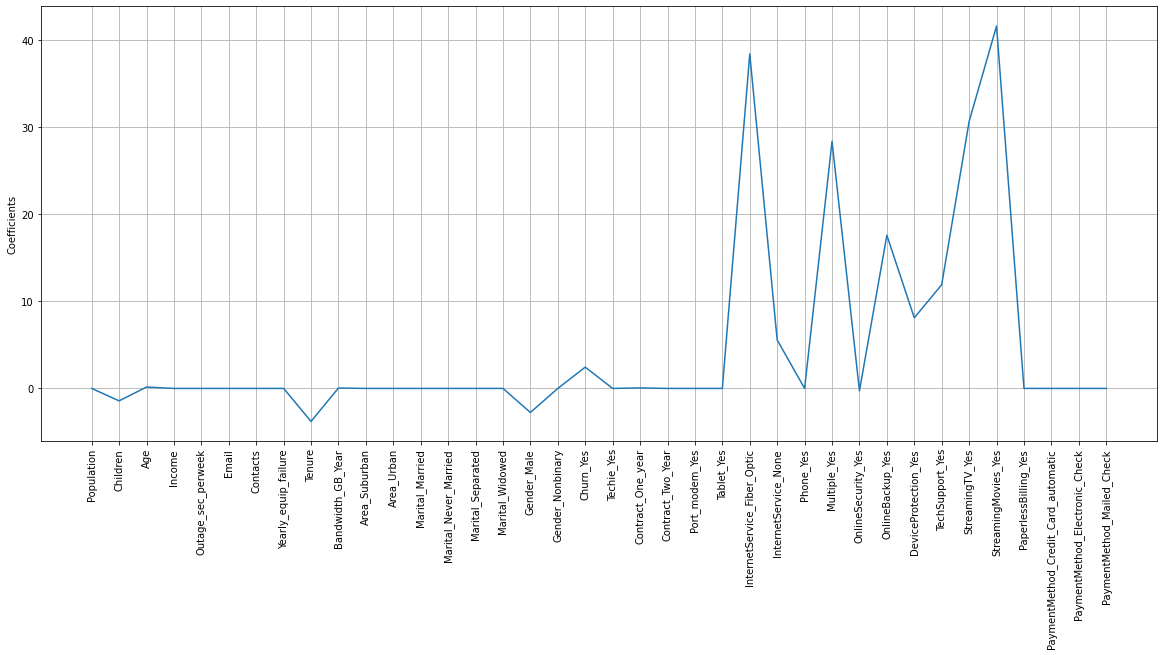

In [10]:
x = x_train
y = y_train
candidates_columns = numeric_columns
linearRegression_obj.lasso_for_feature(x, y, candidates_columns)

having a model that is too performant is not always a good thing. For instance, it can be a marker of overfitting: the model corresponds too closely to a particular set of data, and may therefore fail to predict future observations reliably. 

https://easystats.github.io/parameters/articles/parameters_selection.html

## Multiple Linear Regression (Refined)

In [11]:
formula =  "MonthlyCharge ~ InternetService_Fiber_Optic + Multiple_Yes + OnlineBackup_Yes + TechSupport_Yes + StreamingTV_Yes + StreamingMovies_Yes + 0"
linearRegression_obj.multiple_linear_regression_by_formula(formula, train_df)


formula =  MonthlyCharge ~ InternetService_Fiber_Optic + Multiple_Yes + OnlineBackup_Yes + TechSupport_Yes + StreamingTV_Yes + StreamingMovies_Yes + 0

R-squared =  0.958659205023577
R-squared adjusted =  0.9586237396575692
MSE =  1310.7241355120993
RSE =  1309.9749362348741
MRSE =  36.18840501709994
RSE =  36.20392431093761

Model summary saved on model_summary.txt


### Removing TechSupport_Yes to observe if model improves

R-squared (Coefficient of deternination): How well the linear regression line fits the observed values [0-1] (larger is better)
The difference between predicted and observed values is typically about RSE#

In [12]:
formula =  "MonthlyCharge ~ InternetService_Fiber_Optic + Multiple_Yes + OnlineBackup_Yes + StreamingTV_Yes + StreamingMovies_Yes + 0"
linearRegression_obj.multiple_linear_regression_by_formula(formula, train_df)


formula =  MonthlyCharge ~ InternetService_Fiber_Optic + Multiple_Yes + OnlineBackup_Yes + StreamingTV_Yes + StreamingMovies_Yes + 0

R-squared =  0.9473324501259128
R-squared adjusted =  0.947294803557025
MSE =  1669.604079077955
RSE =  1668.888329972887
MRSE =  40.846193271047326
RSE =  40.86078901683073

Model summary saved on model_summary.txt


## Correlations
### The independent variables are not too highly correlated with each other

In [13]:
columns_list = ["InternetService_Fiber_Optic","Multiple_Yes","OnlineBackup_Yes","TechSupport_Yes","StreamingTV_Yes","StreamingMovies_Yes"]
selected_columns =  import_obj.filter_df_by_columns(df, columns_list)
selected_columns.corr()

,InternetService_Fiber_Optic,Multiple_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
InternetService_Fiber_Optic,1.000000,0.009210,0.001925,-0.026211,-0.005118,0.002211
Multiple_Yes,0.009210,1.000000,-0.002566,-0.010360,0.003097,0.004691
OnlineBackup_Yes,0.001925,-0.002566,1.000000,-0.002802,-0.008043,0.001434
TechSupport_Yes,-0.026211,-0.010360,-0.002802,1.000000,-0.003047,-0.013533
StreamingTV_Yes,-0.005118,0.003097,-0.008043,-0.003047,1.000000,-0.010516
StreamingMovies_Yes,0.002211,0.004691,0.001434,-0.013533,-0.010516,1.000000


## Correlation Graph

Scatterplot init


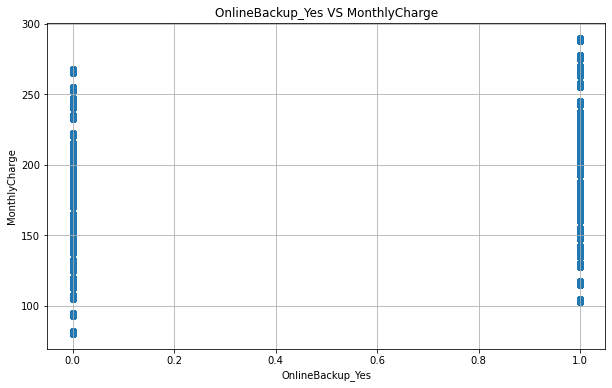

<Figure size 432x288 with 0 Axes>

In [14]:
import Graphs.MyScatterplot as scatter
scatterplot_obj = scatter.Scatterplot()
scatterplot_obj.show_graph(df, "OnlineBackup_Yes", "MonthlyCharge")

## Predict

In [15]:

# explanatory_data = x_test
y_predicted = linearRegression_obj._model.predict(x_test)
print(y_predicted)

# test_data = x_test.assign(prediction=y_predicted)
# print(test_data)

CaseOrder
789     117.297991
5367    214.231164
323     192.532197
4420    138.700779
2613    138.404601
           ...    
5552    129.105097
8614    182.975988
7751    214.231164
9750    117.297991
7626     75.530385
Length: 3000, dtype: float64


## Residuals
ε → Residuals or Error term

Max: 120.004928
Min: -68.62237634951316
Mean: 17.44
Median: 13.54
Mode: [-6.32558581]
Variance: 1398.77
St. Dev: 37.40


Text(0.5, 1.0, 'Residual Plot')

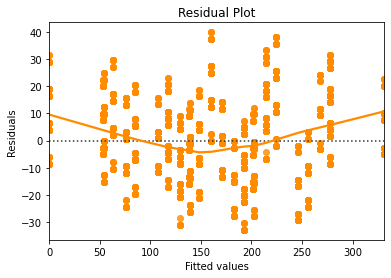

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 

residuals = y_test - y_predicted

summaryStatistics_obj.get_series_summary(residuals)

sns.residplot(x=y_predicted, y=residuals, lowess=True, color='darkorange')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")


From the above residual plot, we could infer that the residuals didn’t form any pattern. So, the residuals are independent of each other.

And also, the residuals have constant variance. Variance doesn’t seem to increase/decrease constantly with the y_predict value.

https://medium.com/mlearning-ai/everything-to-know-about-residuals-in-linear-regression-42747d419266

## Q-Q plot → quantile-quantile plot
To check whether the residuals are normally distributed from Q-Q plot,distplot

If the residuals are normally distributed, then the Q-Q plot of residuals will be a straight line


Text(0.5, 1.0, 'qqplot')

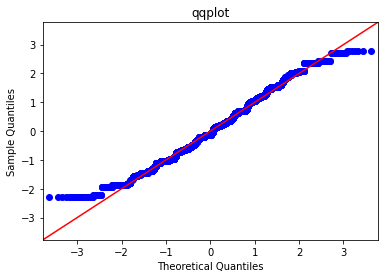

In [18]:
from scipy import stats
import statsmodels.api as sm

residual = linearRegression_obj._model.resid

probplot=sm.ProbPlot(residual,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
plt.title('qqplot')

# Scale-location plot

Text(0, 0.5, 'Sqrt of abs val of stdzed residuals')

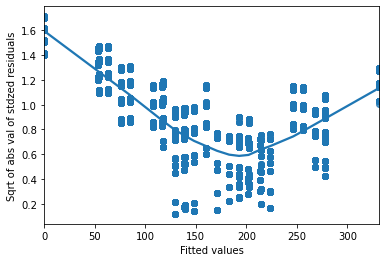

In [19]:
import numpy as np
model = linearRegression_obj._model
# Extract normalized residuals from the model
model_norm_residuals = model.get_influence().resid_studentized_internal
# Square roo of the absolute value to standardize them
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
sns.regplot(x=model.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdzed residuals")

/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

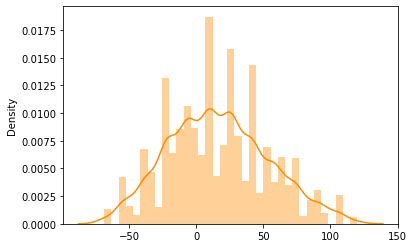

In [ ]:
sns.distplot(residual,color='darkorange')
